# Классификация новостных лент

##  Загрузка данных Reuters

In [5]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Декодирование новостей обратно в текст

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

550378/550378 [==============================] - 0s 1us/step


## Подготовка данных

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

## Конструирование сети

In [13]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Проверка решения

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train =  one_hot_train_labels[1000:]

In [15]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 48ms/step - loss: 2.9186 - accuracy: 0.4242 - val_loss: 2.0065 - val_accuracy: 0.5840
Epoch 2/20
16/16 [==============================] - 0s 28ms/step - loss: 1.6607 - accuracy: 0.6635 - val_loss: 1.4375 - val_accuracy: 0.6740
Epoch 3/20
16/16 [==============================] - 0s 27ms/step - loss: 1.2416 - accuracy: 0.7353 - val_loss: 1.2366 - val_accuracy: 0.7290
Epoch 4/20
16/16 [==============================] - 1s 32ms/step - loss: 1.0132 - accuracy: 0.7840 - val_loss: 1.1002 - val_accuracy: 0.7580
Epoch 5/20
16/16 [==============================] - 0s 29ms/step - loss: 0.8381 - accuracy: 0.8201 - val_loss: 1.0327 - val_accuracy: 0.7770
Epoch 6/20
16/16 [==============================] - 1s 33ms/step - loss: 0.7054 - accuracy: 0.8534 - val_loss: 0.9497 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 0s 32ms/step - loss: 0.5886 - accuracy: 0.8768 - val_loss: 0.9035 - val_accuracy: 0.8010
Epoch 8/20
16

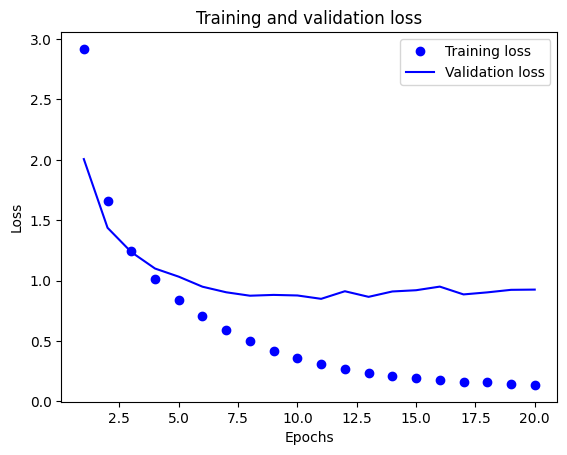

In [16]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

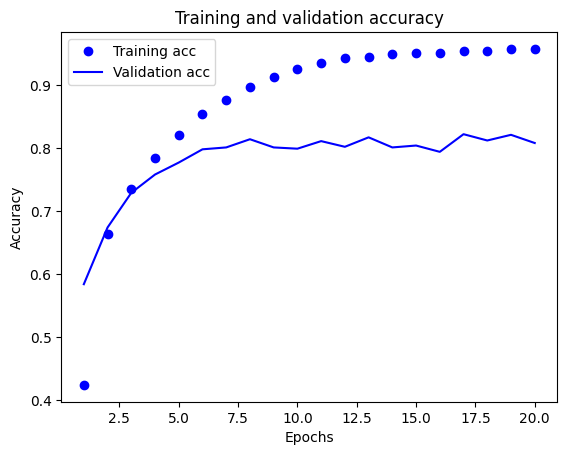

In [21]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Обучение новой модели

In [22]:
model.fit(partial_x_train, partial_y_train,
                    epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 31ms/step - loss: 0.1342 - accuracy: 0.9573 - val_loss: 0.9380 - val_accuracy: 0.8120
Epoch 2/9
16/16 [==============================] - 0s 28ms/step - loss: 0.1252 - accuracy: 0.9572 - val_loss: 1.0285 - val_accuracy: 0.7910
Epoch 3/9
16/16 [==============================] - 0s 30ms/step - loss: 0.1247 - accuracy: 0.9582 - val_loss: 0.9345 - val_accuracy: 0.8090
Epoch 4/9
16/16 [==============================] - 0s 24ms/step - loss: 0.1208 - accuracy: 0.9584 - val_loss: 0.9651 - val_accuracy: 0.8080
Epoch 5/9
16/16 [==============================] - 0s 23ms/step - loss: 0.1166 - accuracy: 0.9579 - val_loss: 0.9491 - val_accuracy: 0.8200
Epoch 6/9
16/16 [==============================] - 0s 31ms/step - loss: 0.1091 - accuracy: 0.9593 - val_loss: 0.9826 - val_accuracy: 0.8010
Epoch 7/9
16/16 [==============================] - 0s 26ms/step - loss: 0.1132 - accuracy: 0.9572 - val_loss: 0.9640 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

In [23]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 1.1631 - accuracy: 0.7850


## Prediction

In [24]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step
